# 2차원 2클래스 분류(Classification)

In [1]:
# %reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline
# %config inlineBackend.figur_format = 'retina'

In [2]:
np.random.seed(seed=1)  # 난수를 고정
W = np.array([3./4., 1.0, -4./5.])
N = 50
dim = 2
K = 2
scale = 1;
T = np.zeros((N, K), dtype=np.uint8)
X = scale*np.random.rand(N, dim)
print(X.shape)

(50, 2)


In [7]:
for n in range(N):
    for k in range(K):
        if W[0]*X[n, 0]+W[1]*X[n, 1]+W[2] > 0:
            T[n, 1] = 1
        else:
            T[n, 0] = 1
            
print(X[:5, :])
print(T[:5, :])

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]]
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


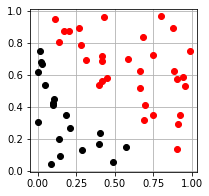

In [9]:
def show_data(x, t):
    c = [[0, 0, 0,], [1, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], linestyle='none', marker='o', color=c[k])
        plt.grid(True)

plt.figure(figsize=(3, 3))
show_data(X, T)

In [10]:
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))  # sigmoid
    return y

In [11]:
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0  # cross-entropy
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

# test---
_W=[-1., -1., -1.]
cee_logistic2(_W, X, T)

0.7170005111218646

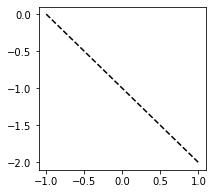

In [12]:
def show_line(W):
    xn = 50 # 파라미터의 분할 수
    X_range0 = [-1, 1]  # X0 범위 표시용
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = -(W[0]/W[1])*x0 - W[2]/W[1]
    plt.plot(x0, x1, '--k')
    
# test ---
plt.figure(figsize=(3,3))
_W=[-1, -1, -1]
show_line(_W)

In [13]:
def fit_logistic(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t), method="CG")
    return res.x

C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\kss34\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\kss34\anaconda3\lib\sit

w0 = -54.00, w1 = -50.15, w2 = 43.29


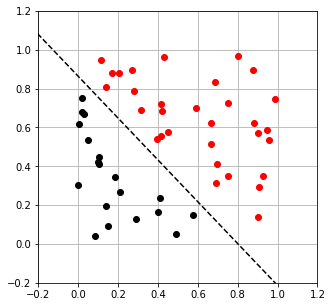

In [16]:
# 메인 --------------------------
plt.figure(1, figsize=(5,5))
W_init = [1, 1, -1]
# lr = 0.1
# itr = 3000
_W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(_W[0], _W[1], _W[2]))

show_data(X, T)
show_line(_W)
plt.xlim(-.2, 1.2)
plt.ylim(-.2, 1.2)
plt.show()